<a href="https://colab.research.google.com/github/leeshark21/lee/blob/main/Handwritten_Digit_Recognition_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [ ]:
# Load MNIST
from tensorflow.keras.datasets import mnist
import pandas as pd

(X_train, y_train), (_, _) = mnist.load_data()

# Flatten images (28x28 -> 784) to view as table
X_flat = X_train.reshape(-1, 28*28)

# Create DataFrame of first 5 images
df_before = pd.DataFrame(X_flat[:5])
df_before['label'] = y_train[:5]

# Show "before processing" table
df_before.head()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


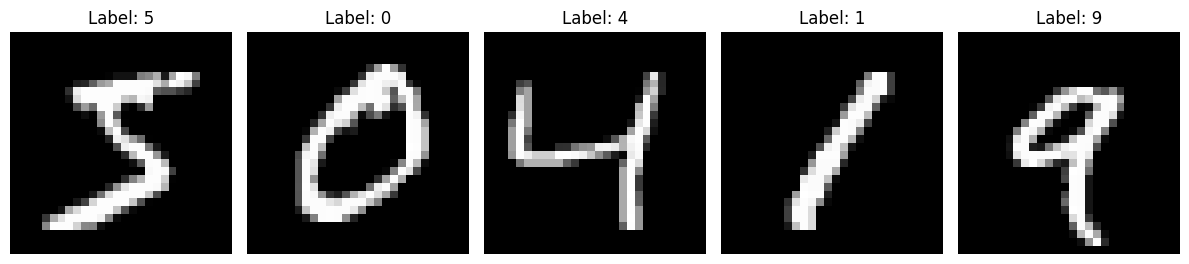

In [ ]:
import matplotlib.pyplot as plt

# Normalize pixel values (0 to 1)
X_norm = X_train / 255.0

# Reshape for CNN input (batch, height, width, channels)
X_reshaped = X_norm.reshape(-1, 28, 28, 1)

# Plot first 5 processed images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_norm[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


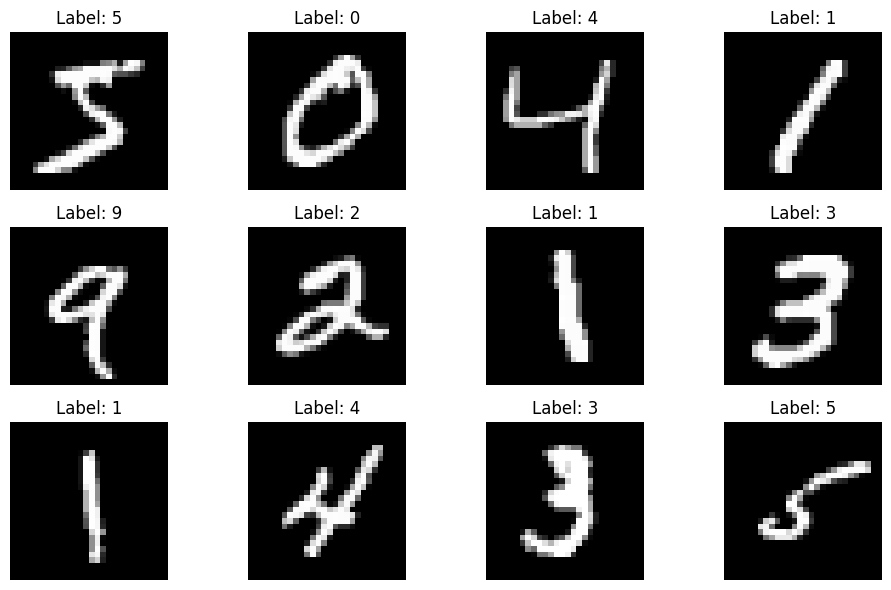

In [ ]:
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.7567 - loss: 0.7513 - val_accuracy: 0.9757 - val_loss: 0.0836
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 137ms/step - accuracy: 0.9594 - loss: 0.1397 - val_accuracy: 0.9837 - val_loss: 0.0586
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 131ms/step - accuracy: 0.9698 - loss: 0.0968 - val_accuracy: 0.9858 - val_loss: 0.0466
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 136ms/step - accuracy: 0.9733 - loss: 0.0856 - val_accuracy: 0.9870 - val_loss: 0.0417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 130ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9876 - val_loss: 0.0423
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.9896 - val_loss: 0.0355
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 123ms/step - accuracy: 0.9836 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9901 - loss: 0.0292

Test Accuracy: 0.9923


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


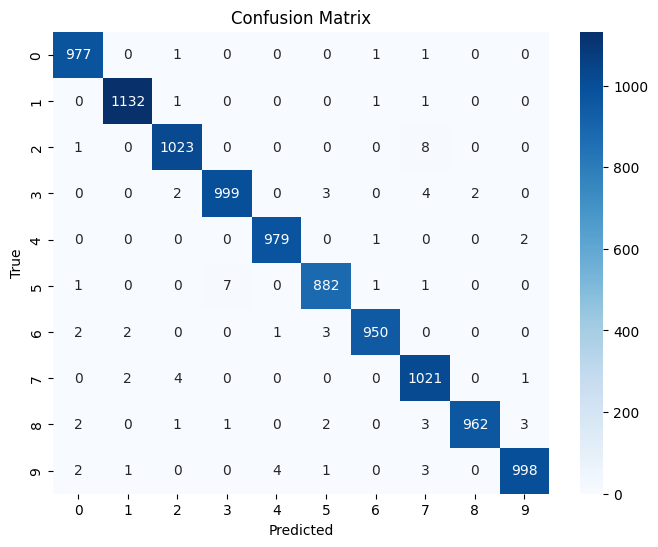

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


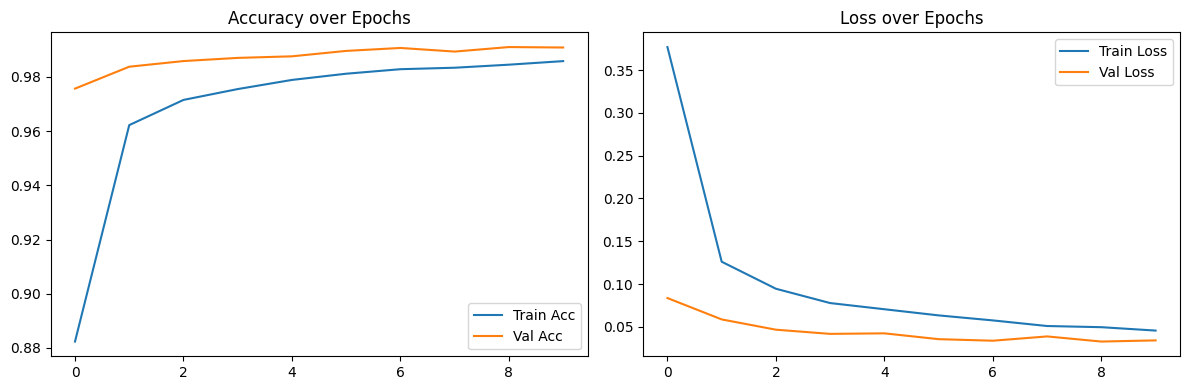

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


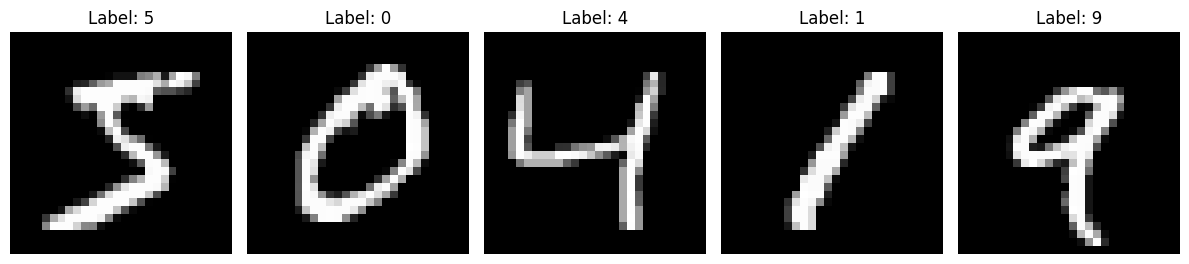

In [ ]:
import matplotlib.pyplot as plt

# Normalize pixel values (0 to 1)
X_norm = X_train / 255.0

# Reshape for CNN input (batch, height, width, channels)
X_reshaped = X_norm.reshape(-1, 28, 28, 1)

# Plot first 5 processed images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_norm[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
fig = px.imshow(X_test[0].reshape(28, 28), color_continuous_scale='gray')
fig.update_layout(title=f'Predicted: {y_pred[0]}, Actual: {y_test[0]}')
fig.show()
